In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
sys.path.append('../common')

In [2]:
# define global variables
test_size = 0.2
random_state = 42

In [3]:
# Read the dataset
dataset = pd.read_csv('../Data/data.csv')
dataset.head(10)

,Id,Length,Width,Type
0,1,21.353462,17.489515,0
1,2,19.777907,20.954282,0
2,3,21.959486,22.399416,0
3,4,16.237031,17.155274,0
4,5,21.547234,23.214418,0
5,6,16.651716,15.504583,0
6,7,23.233582,19.005026,0
7,8,21.018607,23.798118,0
8,9,20.893276,19.365433,0
9,10,19.054253,19.517992,0


In [4]:
# We will not use Id as part of classification
dataset = dataset.drop(['Id'], axis = 1)
dataset.head(10)

,Length,Width,Type
0,21.353462,17.489515,0
1,19.777907,20.954282,0
2,21.959486,22.399416,0
3,16.237031,17.155274,0
4,21.547234,23.214418,0
5,16.651716,15.504583,0
6,23.233582,19.005026,0
7,21.018607,23.798118,0
8,20.893276,19.365433,0
9,19.054253,19.517992,0


In [5]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

In [6]:
# Create matrix X and Y as numpy arrays 
# if we dont use .values, it will remain a dataframe
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

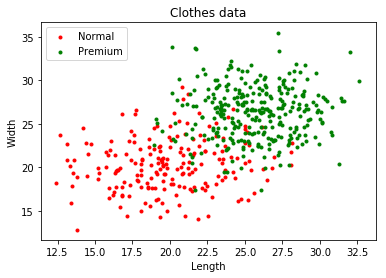

In [7]:
# Visualize the data
plt.scatter(x = X[Y == 0, 0], y = X[Y == 0, 1], color = 'red', marker = '.', label = 'Normal')
plt.scatter(x = X[Y == 1, 0], y = X[Y == 1, 1], color = 'green', marker = '.', label='Premium')
plt.title("Clothes data")
plt.xlabel("Length")
plt.ylabel("Width")
plt.legend()
plt.show()

In [8]:
# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)

In [9]:
# Apply random forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth = 2, random_state = random_state)
classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [10]:
# Training fit
from commonfunctions import print_classification_results, plot_classification_summary
Y_train_pred = classifier.predict(X_train)
print_classification_results(Y_train, Y_train_pred)

Confusion Matrix:
 [[135  23]
 [ 12 230]]
Accuracy score: 0.9125
Classification Report:
              precision    recall  f1-score   support

          0       0.92      0.85      0.89       158
          1       0.91      0.95      0.93       242

avg / total       0.91      0.91      0.91       400



In [11]:
# Testing fit 
Y_pred = classifier.predict(X_test)
print_classification_results(Y_test, Y_pred)

Confusion Matrix:
 [[34  8]
 [ 5 53]]
Accuracy score: 0.87
Classification Report:
              precision    recall  f1-score   support

          0       0.87      0.81      0.84        42
          1       0.87      0.91      0.89        58

avg / total       0.87      0.87      0.87       100



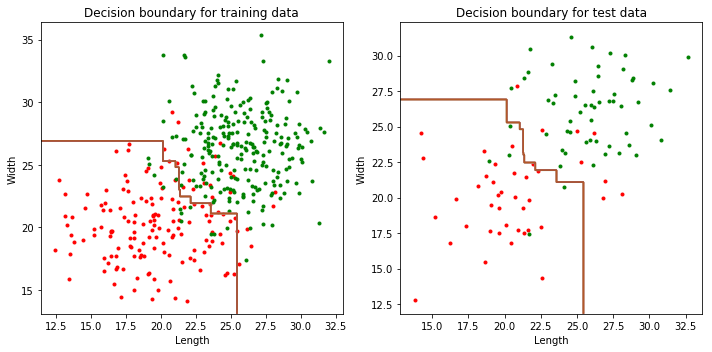

In [12]:
plot_classification_summary(X_train, Y_train, X_test, Y_test, classifier, plt)

Depth =  2


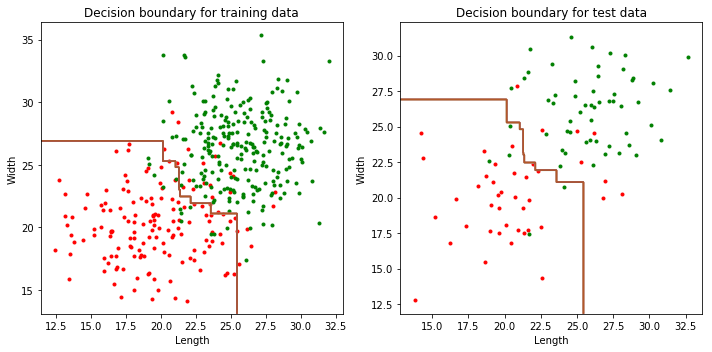

Depth =  3


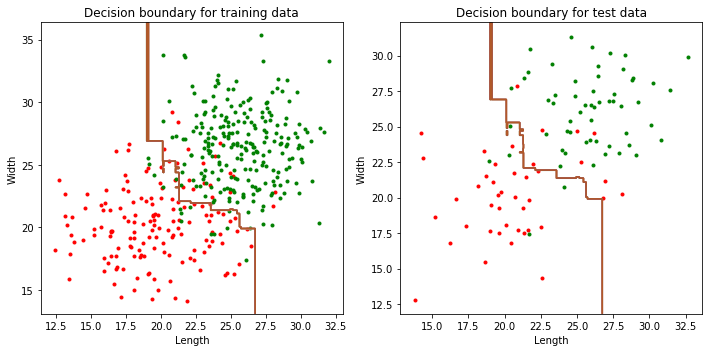

Depth =  4


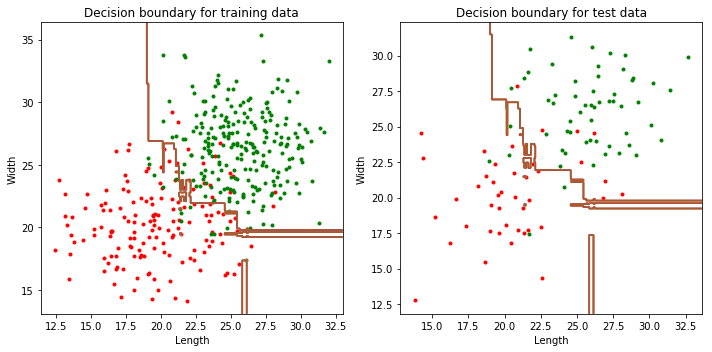

Depth =  5


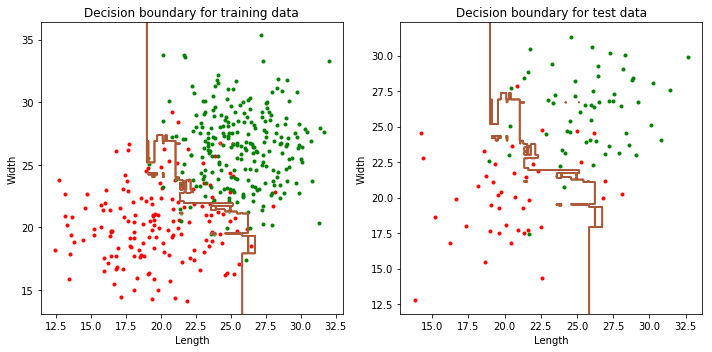

In [13]:
# Check impact of tree depth on the decision boundaries
for depth in range(2, 6):
    print( "Depth = ", depth)
    classifier = RandomForestClassifier(max_depth = depth, random_state = random_state)
    classifier.fit(X_train, Y_train)
    Y_train_pred = classifier.predict(X_train)
    Y_pred = classifier.predict(X_test)
    plot_classification_summary(X_train, Y_train, X_test, Y_test, classifier, plt)

In [14]:
# Get column names and feature importance for all the features
columns = list(dataset.columns.values) [:-1]
importance = classifier.feature_importances_

In [20]:
# Sort the feature list based on feature importance
print(list(zip(importance,columns)))

['Width', 'Length']
[(0.56562623364887143, 'Length'), (0.43437376635112851, 'Width')]
